In [16]:
import os
import soundfile  as sf
import matplotlib.pyplot as plt
import numpy as np
import librosa
from util import audio
import numpy as np

In [52]:
f_tbl = [100,125,160,200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3200,4000,5000]
a2i = [0,0,20,11,7,12,6,-2,-10,-18,-21,-20,-21,0,0,0,10,0]
a2u = [0,-2,16,15,17,20,14,9,3,9,-20,-23,-22,-21,-3,-5,0,0]
a2e = [0,0,0,0,0,8,16,10,-1,-13,-22,-10,5,0,0,0,0,0]
a2o = [0,0,0,0,0,0,11,16,16,13,-4,-16,-10,0,0,0,0,0]

print(len(a2i),len(a2u),len(a2e),len(a2o))
filter_bank = {}
for fi,f in enumerate(f_tbl):
    filter_bank[f] = a2i[fi] 

17 17 17 17


In [44]:
for key in filter_bank:
    print("key: %s , value: %s" % (key, filter_bank[key]))

key: 100 , value: 0
key: 125 , value: 24
key: 160 , value: 24
key: 200 , value: 24
key: 250 , value: 24
key: 315 , value: 15
key: 400 , value: 7
key: 500 , value: 0
key: 630 , value: -10
key: 800 , value: -24
key: 1000 , value: -24
key: 1250 , value: -24
key: 1600 , value: -20
key: 2000 , value: -5
key: 2500 , value: 7
key: 3200 , value: 14
key: 4000 , value: 12
key: 5000 , value: 0
key: 6300 , value: 0
key: 8000 , value: 0


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


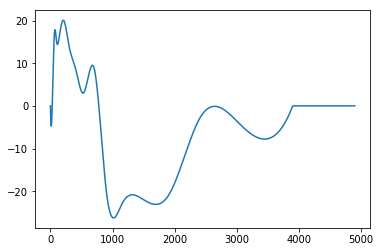

In [54]:
import scipy
test = range(100,5000)
curve = scipy.interpolate.spline(f_tbl,a2u,test)
plt.plot(curve)
plt.show()

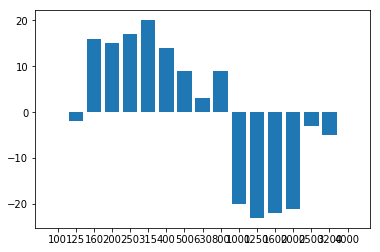

In [55]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
height = a2u

bars = f_tbl

y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()
 

In [32]:
t[2]

1

In [23]:
def toDB(x):
    return 20*np.log10(x)
toDB(0.15)

-16.478174818886377

In [17]:
x,fs = sf.read('my_a.wav')
frame_period = 10
X = librosa.stft(x,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
print(X.shape)
xx = librosa.istft(X,hop_length=int(44100/(1000/frame_period)))

(1025, 383)


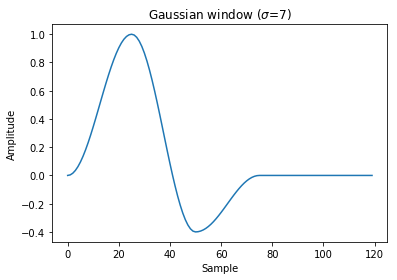

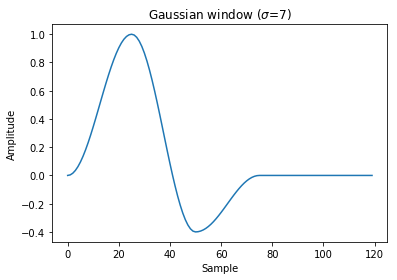

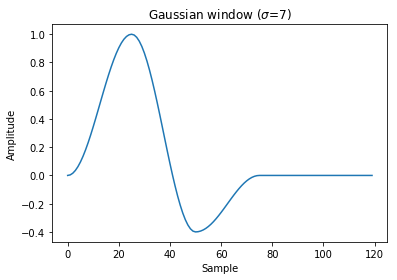

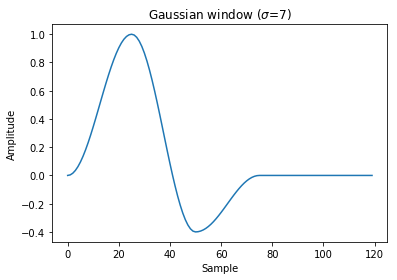

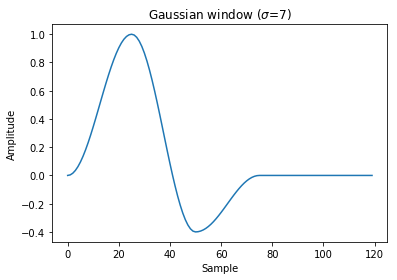

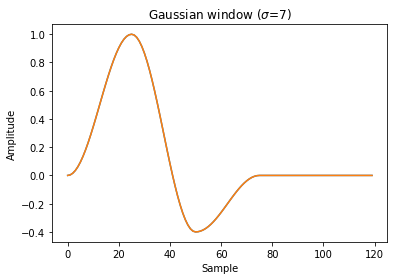

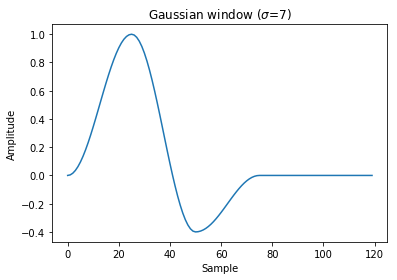

<Figure size 432x288 with 0 Axes>

In [19]:
from scipy import signal
from scipy.fftpack import fft, fftshift

# window = signal.gaussian(51, std=7)
window = np.hanning(51)
x = np.zeros((120,))
x[25-25:25+25+1] = window
x[50-25:50+25+1] -= window*0.4

plt.plot(x)


plt.title(r"Gaussian window ($\sigma$=7)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.figure()
plt.show()


In [20]:
xlog = np.zeros((120,))
f =range(120)
for i in range(len(xlog)):
    xlog[i] = np.interp(i**1.5, f, x)

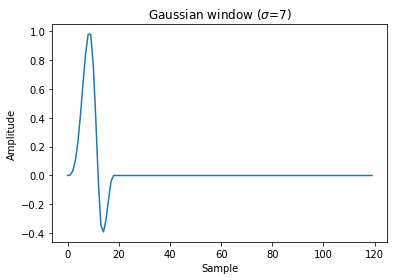

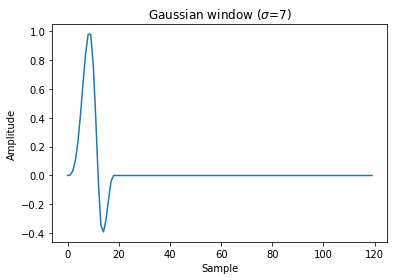

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(xlog)
plt.title(r"Gaussian window ($\sigma$=7)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.figure()
plt.show()